## Improve model from mvp-Copy1.ipynb

## Exploratory Data Analysis

### Import Libraries and Load the Data

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Populating the interactive namespace from numpy and matplotlib


In [2]:
#load Wisconsin diagnostic dataset, downloaded from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
data = "data/raw/wisconsin_data.csv"
df = pd.read_csv(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Kaggle dataset uploader says there are "no missing attribute values".

32 features, interested in first 12: ID, diagnosis, and 10 calculated features (the rest are the standard error and 'worst'(largest) value for each of the 10 features)

The 10 features are described as follows:


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

569 observations, no null values

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#drop the last column since it doesn't provide relevant information
#df.drop() #default is dropping rows
df.drop(['Unnamed: 32'], axis=1)

#original dataframe not modified, need to assign dropped df to variable

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Select smaller dataframe to work on

Want to find a few features that are most highly correlated with diagnosis (target feature), and use those for 
 classification models for mvp
 
make a smaller dataframe, don't need the SE and "worst" features since they were calculated based on measured features themselves (would be leaky variables)


In [6]:
sdf = df.iloc[:, :12]
sdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [7]:
type(sdf.iloc[:,1])
sdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
#pairplot missing diagnosis column because it's not numerical! change into binary first
#M=malignant==1, B=benign==0

#replace the string "M" with integer 1,replace the string "B" with integer 0; return column(pandas series) with strings replaced by int'''

#easiest option to replace content (easier than defining function and appending a list): 
sdf.replace({'diagnosis':['M','B']},{'diagnosis': [1,0]}).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


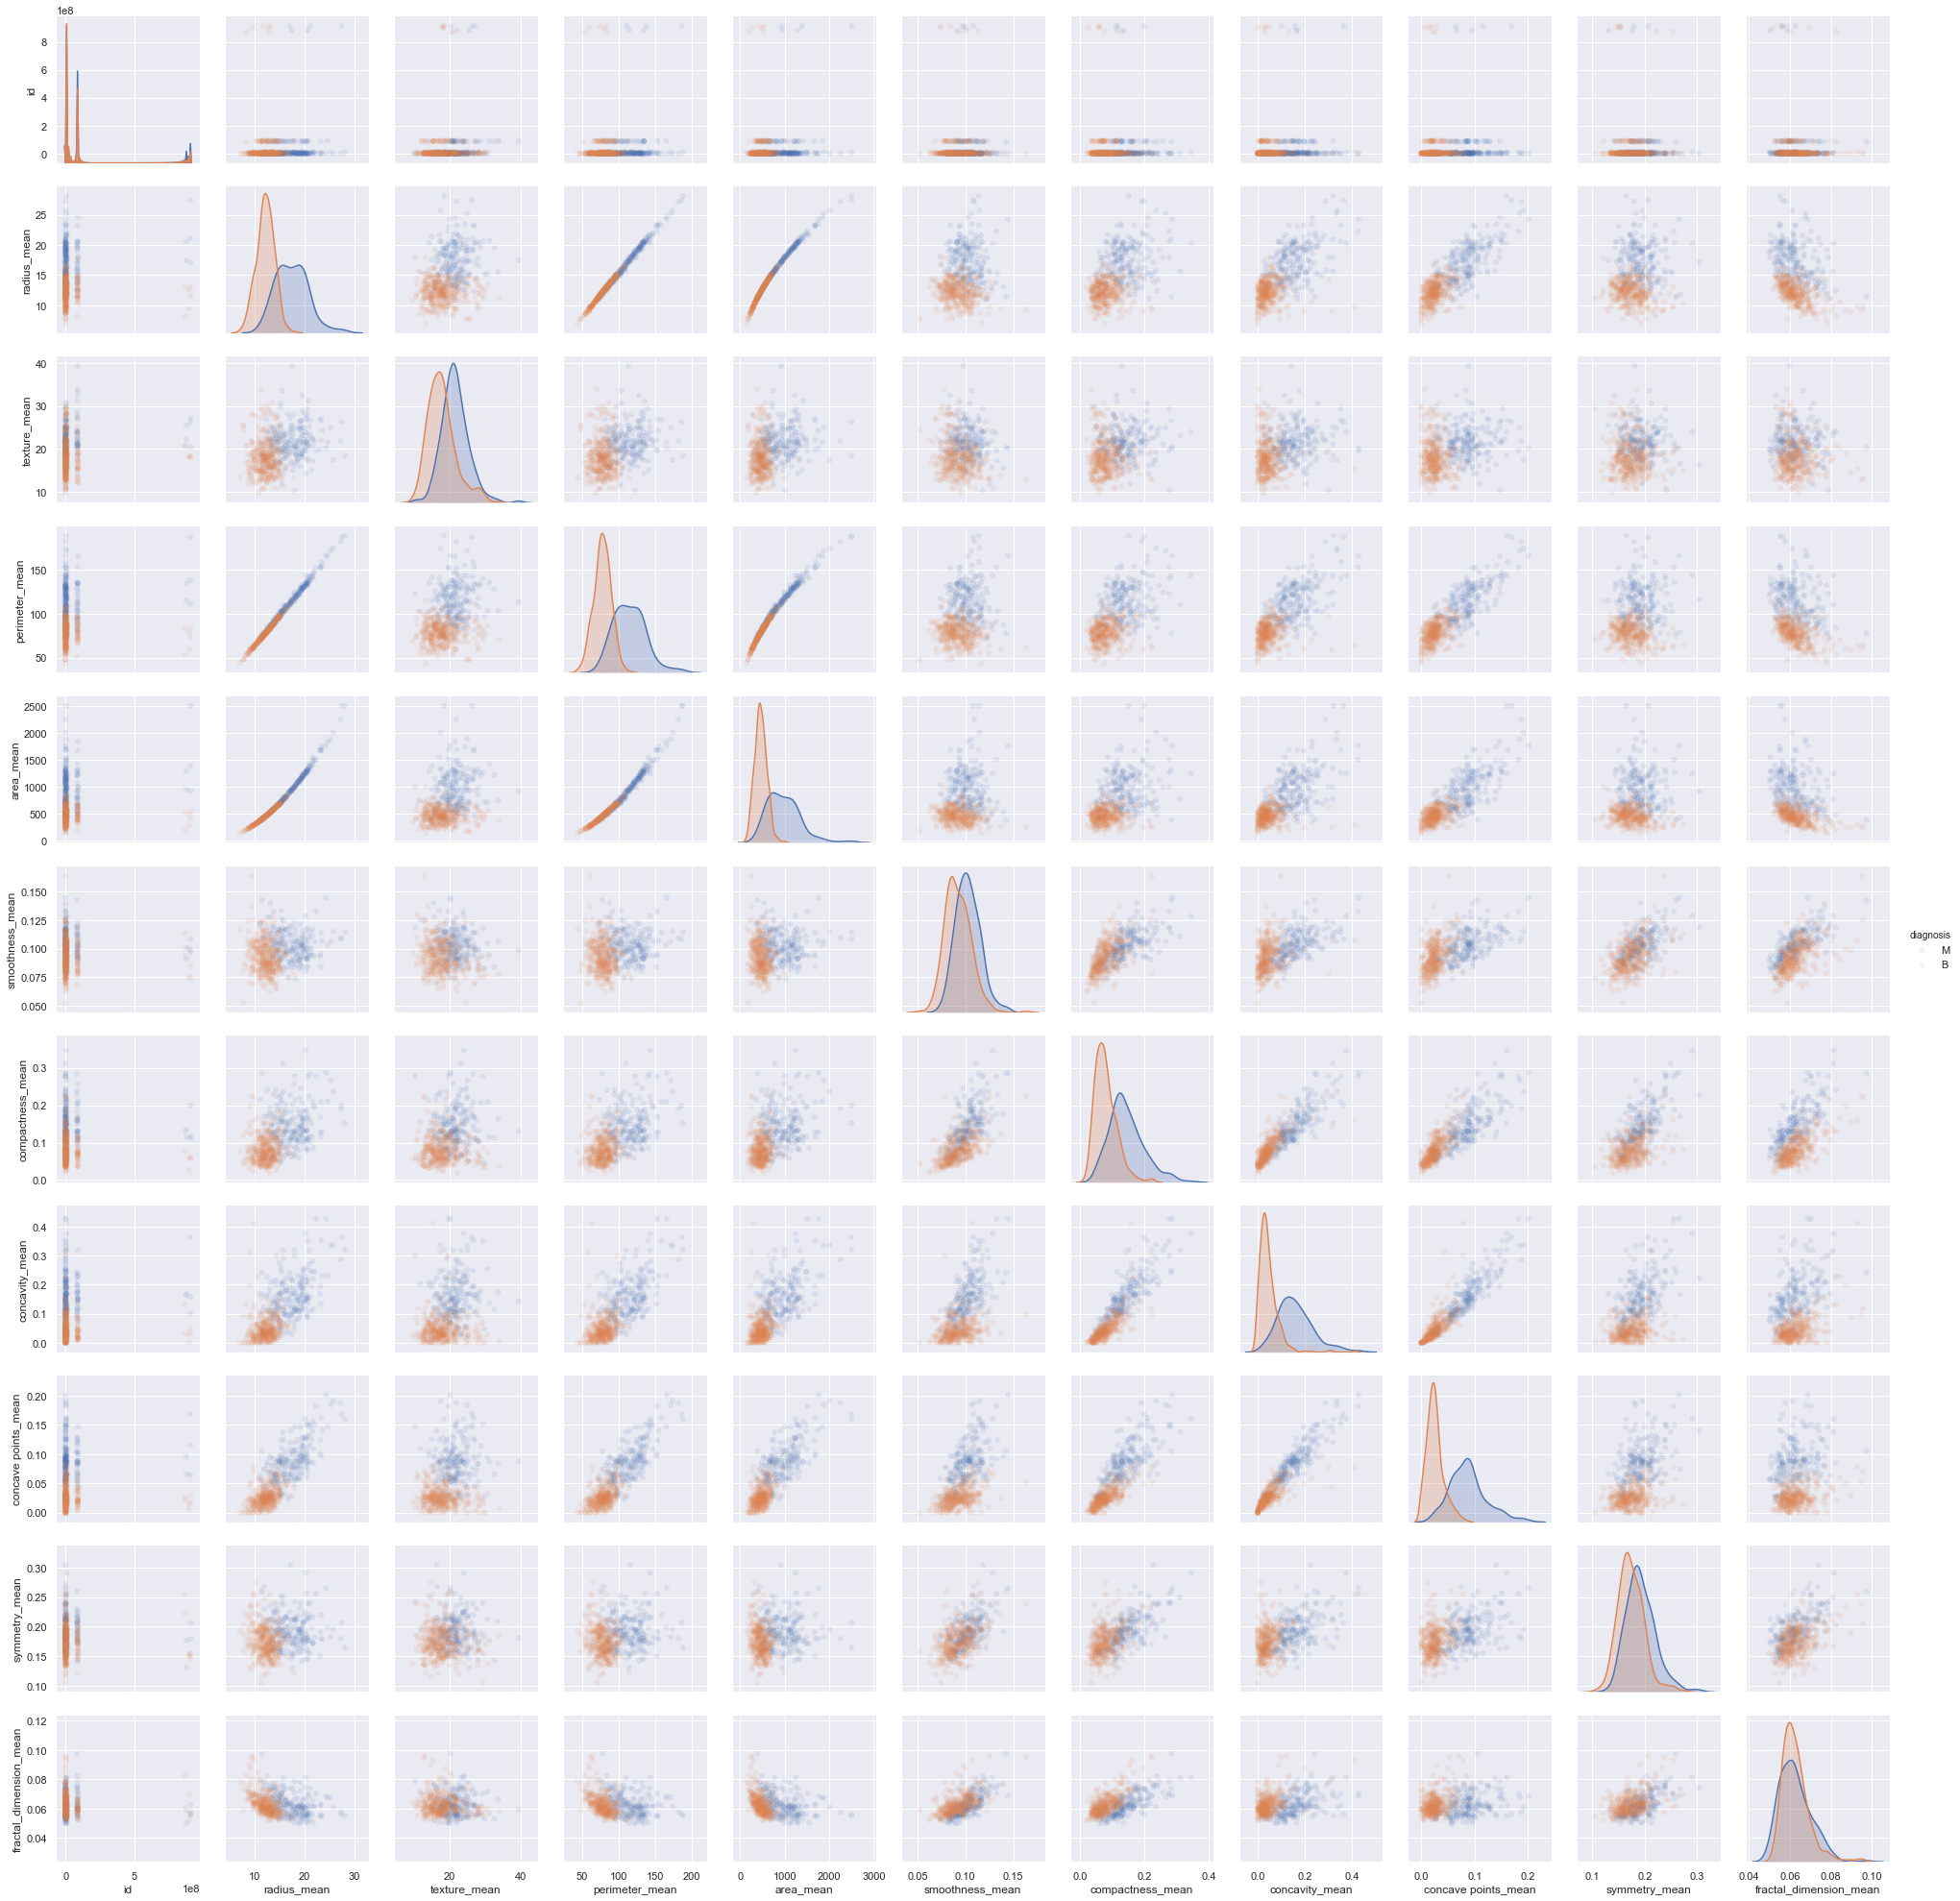

In [9]:
#pairplot of relationship between each of the cell features and diagnosis (target feature)
#pairplot using hues for target feature (malignant = 1, benign = 0)
pairplot=sns.pairplot(sdf, hue='diagnosis', plot_kws=dict(alpha=.1, edgecolor='none'));

From the pair plot above - Malignant (1) shown in Blue, and Benign(0) shown in Orange. 

We can see that the feature neat the middle(smoothness_mean) and the last two features (symmetry_mean and fractal_dimension_mean) are not helpful for classification, because they give almost overlapping probability distributions to the two classes (so we cannot draw a clear line in the middle to separate them).

We also see that some features that give a good prediction are very strongly correlated, producing almost a diagonal line, such as radius-perimeter, radius-area, perimeter-area, as well as concave_points and concavity. 

Based on conclusions from this pairplot, the features **perimeter_mean** and **concavity_mean** would be the most interesting independent X features to use for feature engineering later, to predict the target feature y (diagnosis).

Work with all the unique features first, to see which classification model to choose:

In [10]:
# split df into X, y, put into model first to see how good it is
# create X (features) and y (target: diagnosis)
X = pd.DataFrame(sdf.drop(['id','diagnosis'],axis=1))#drop id and target feature (diagnosis) so we don't accidentally use it in our prediction
#also drop ID column

y = sdf.replace({'diagnosis':['M','B']},{'diagnosis': [1,0]}).diagnosis #replaced M and B with classes 1 and 0 as shown above;
#assign binary diagnosis column to y

X.sample() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10)
memory usage: 44.6 KB


## Build and train model

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, KFold
from sklearn import svm, naive_bayes, neighbors, tree, ensemble, neural_network



### Train-validation-test split

In [13]:
#followed this guide:https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
#doing train_val_test split manually, need to split twice!
#split to train and test first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14) 

#then split train to smaller train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=14)

#k fold=5
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

### Make pipeline - feature scaling and cross-validation for each model

build pipeline and fit on train data set to compare model performance

#### Logistic Regression

In [14]:
X_train.columns#jp glitch, restarted kernel, to get 10 features back again

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [15]:
LR_pipeline = make_pipeline(preprocessing.StandardScaler(), 
                            LogisticRegression(C=5000, solver = 'lbfgs', random_state = 24))

#not necessary? not specifying which class to predict
#cross_val_score(LR_pipeline, X_train, y_train, cv=kf) #accuracy value of 5 folds

In [16]:
LR_pipeline.fit(X_train, y_train)

#(y_val, LR_pipeline.predict_proba(X_val)[:,1]) 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=5000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=24,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### SVM

In [17]:
svm_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=10, probability=True))

svm_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

#### Gaussian Naive Bayes

In [18]:
NBG_pipeline = make_pipeline(preprocessing.StandardScaler(), naive_bayes.GaussianNB())

NBG_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

#### K Nearest Neighbours

In [19]:
KNN_pipeline = make_pipeline(preprocessing.StandardScaler(), neighbors.KNeighborsClassifier(n_neighbors=3))
KNN_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

#### Decision Tree

In [20]:
DT_pipeline = make_pipeline(preprocessing.StandardScaler(), tree.DecisionTreeClassifier(random_state=20))
DT_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=20,
                                        splitter='best'))],
         verbose=False)

#### Random Forest

> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

*Reference: RandomForest overview chapter: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm*

In [21]:
RF_pipeline = make_pipeline(preprocessing.StandardScaler(), 
                                       ensemble.RandomForestClassifier(n_estimators=100, max_depth=2, random_state=20))
#100 trees each with depth of 2

In [22]:
RF_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=20,
                                        verbose=0, warm_start=False))],
         verbose=False)

#### Gradient Boosting


In [23]:
GB_pipeline = make_pipeline(preprocessing.StandardScaler(), 
                                    ensemble.GradientBoostingClassifier())
#use default, n_estimators=100

In [24]:
GB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            pr

#### Multi-layer Perceptron

(sklearn doc)
> MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

> It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

In [25]:
MLP_pipeline = make_pipeline(preprocessing.StandardScaler(), neural_network.MLPClassifier(random_state=10))
MLP_pipeline.fit(X_train, y_train)

/Library/anaconda/envs/metis/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=10, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

### Predict and Score

Choosing AUC score as metric (area under the curve, = 1 for perfect model), compare model performance on validation set

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, fbeta_score, balanced_accuracy_score

#### Logistic Regression

roc_auc_score() takes in two mandatory parameters:

y_true : array; True binary labels or binary label indicators.

y_score : Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers). For binary y_true, y_score is supposed to be the score of the class with greater label.

In [27]:
#previously, fit pipeline on training set
#predict score on validation set:
roc_auc_score(y_val, LR_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.9884375

In [28]:
roc_auc_score(y_val, LR_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.0115625

#### SVM

In [29]:
roc_auc_score(y_val, svm_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.98375

#### SVM - Linear SVC

In [30]:
#calculate for linear kernel, for which we have coefficients in 3.5.1.2

lsvm_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=10, kernel='linear', probability=True))

lsvm_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [31]:
roc_auc_score(y_val, lsvm_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.9884375000000001

In [32]:
roc_auc_score(y_val, lsvm_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.0115625

#### Random Forest


In [33]:
roc_auc_score(y_val, RF_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.9875

In [34]:
roc_auc_score(y_val, RF_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.0125

#### Gradient Boosting

In [35]:
roc_auc_score(y_val, GB_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.99

In [36]:
roc_auc_score(y_val, GB_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.01

#### Gaussian Naive Bayes

In [37]:
roc_auc_score(y_val, NBG_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.988125

In [38]:
roc_auc_score(y_val, NBG_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.011875

#### K Nearest Neighbours

In [39]:
roc_auc_score(y_val, KNN_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.97265625

In [40]:
roc_auc_score(y_val, KNN_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.02734375

#### Decision Tree

In [41]:
roc_auc_score(y_val, DT_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.94875

In [42]:
roc_auc_score(y_val, DT_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.051250000000000004

#### Multi-layer Perceptron

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

In [43]:
roc_auc_score(y_val, MLP_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

0.9918750000000001

In [44]:
roc_auc_score(y_val, MLP_pipeline.predict_proba(X_val)[:,0]) #auc score for class 0

0.008125

### **Benchmark of cv models
#### ROC-AUC Score for Class 1 = "Malignant" 
 
 Standard Scaler, mean over cv=5 folds, keep 7 decimals, mostly default settings
 
| Model        | Settings         |   Validation Score: AUC |
| ------------- |:-------------:| -----:|
| SVM     | C = 10, rbf (default)    | 0.9837500|
|SVM  | C=10, linear kernel|0.9884375|
| LogisticRegression      |Cs=5000|0.9884375 |
|Gradient Boosting| | 0.9903125|
|RandomForest| n_estimators=100, max_depth=2, random_state=20|0.9875000|
| Gaussian Naive Bayes |    |0.9881250| 
| KNN | N=5      |  0.9726563 |
|MLP|random_state=10|0.9918750|
| DecisionTree|random_state=20|0.9487500|



Performance based on AUC score on ROC curve (True positive rate vs. false positive rate) shows MLP, Linear SVM, Logistic Regression, Gradient Boosting, and Random Forest as the top performing models. Their scores are really close, almost tied if round off to 0.99. 

I don't fully understand how to interpret Multi-layer Perceptrion coefficients, so decide to choose simplest model with highest performance (Logistic Regression).

In [45]:
#feature engineering? remove correlated features or add interactions? not priority right now because model performance is good

##### ROC-AUC Curves for best performing models
Logistic regression and Linear SVC (used linear because it has coeff attribute)

In [46]:
auc_LR1=roc_auc_score(y_val, LR_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

In [47]:
auc_GB1=roc_auc_score(y_val, GB_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

In [48]:
auc_lsvm1=roc_auc_score(y_val, lsvm_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

In [49]:
auc_RF1=roc_auc_score(y_val, RF_pipeline.predict_proba(X_val)[:,1]) #auc score for class 1

In [50]:
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_train, LR_pipeline.predict_proba(X_train)[:,1])


In [51]:
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_train, GB_pipeline.predict_proba(X_train)[:,1])

In [52]:
fpr_lsvm, tpr_lsvm, thresholds_lsvm = roc_curve(y_train, lsvm_pipeline.predict_proba(X_train)[:,1])

In [53]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train, RF_pipeline.predict_proba(X_train)[:,1])

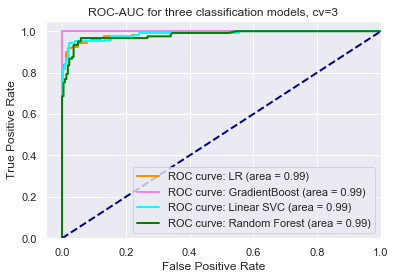

In [54]:
plt.figure()
lw = 2
plt.plot(fpr_LR, tpr_LR, color='darkorange',
         lw=lw, label='ROC curve: LR (area = %0.2f)' % auc_LR1) #auc for class 1
plt.plot(fpr_GB, tpr_GB, color='violet',
         lw=lw, label='ROC curve: GradientBoost (area = %0.2f)' % auc_GB1) #auc for class 1
plt.plot(fpr_lsvm, tpr_lsvm, color='cyan',
         lw=lw, label='ROC curve: Linear SVC (area = %0.2f)' % auc_lsvm1) #auc for class 1
plt.plot(fpr_RF, tpr_RF, color='green',
         lw=lw, label='ROC curve: Random Forest (area = %0.2f)' % auc_lsvm1) #auc for class 1

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC for three classification models, cv=3')
plt.legend(loc="lower right")
#plt.savefig('mvp_new_roc_auc_LR_lsvm_GB_RF.svg') #need to call before plt.show! after plt.show() is called, a new figure is created
plt.show()


#### Using Confusion Matrix to heck model performance on both Class 1 and Class 0

**Decide which class to prioritize on! TP is the most important in this case (prediciting Positive/Malignant incorrectly is more harmful than false alarms (false positives)** -- *TP more important than TN*, if prediction for TP good, less concerned about class imbalance 

can just include the 2 confusion matrices already in mvp code -- copy over

In [55]:
LR_pipeline.fit(X_train, y_train) 
#fit pipeline on train set again because it gets confused about the smaller ft eng dataset below (glitch in jupyter notebook?)
LRpred = LR_pipeline.predict(X_val)
cm_LR = confusion_matrix(y_val, LRpred)
print('Confusion matrix, LR, without normalization')
cm_LR

#new confusion matrix after correct split

Confusion matrix, LR, without normalization


array([[58,  6],
       [ 4, 46]])

In [56]:
GB_pipeline.fit(X_train, y_train) 
GBpred = GB_pipeline.predict(X_val)
cm_GB = confusion_matrix(y_val,GBpred)
print('Confusion matrix, GB, without normalization')
cm_GB

Confusion matrix, GB, without normalization


array([[61,  3],
       [ 1, 49]])

In [57]:
lsvm_pipeline.fit(X_train, y_train) 
lspred = RF_pipeline.predict(X_val)
cm_lsvm = confusion_matrix(y_val,lspred)
print('Confusion matrix, RF, without normalization')
cm_lsvm

Confusion matrix, RF, without normalization


array([[61,  3],
       [ 3, 47]])

In [58]:
#modified sklearn-defined example function to plot non-normalized and normalized confusion matrices
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)] #unique_labels undefined
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
            
    #fix subplots in this chunk    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(2),
           yticks=np.arange(2), 
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    #matplotlib workaround for heatmap cutoff bug:
    ax.set_ylim(len(cm)-0.5, -0.5)
    
    # Hide grid lines
    ax.grid(False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[58  6]
 [ 4 46]]
Normalized confusion matrix
[[0.91 0.09]
 [0.08 0.92]]


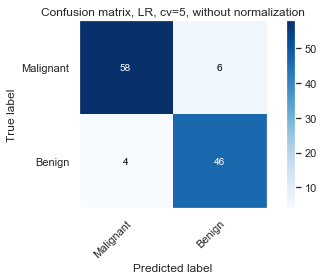

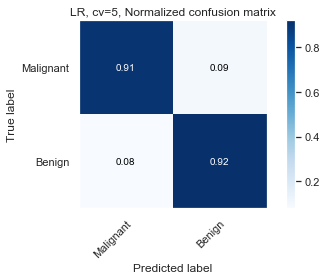

In [59]:
classes = ['Malignant','Benign']

#Logistic Regression
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val, LRpred, classes=classes,
                      title='Confusion matrix, LR, cv=5, without normalization')

plt.savefig('new_cm_LR_val.png') #need to call before plt.show!

# Plot normalized confusion matrix
plot_confusion_matrix(y_val, LRpred, classes=classes, normalize=True,
                      title='LR, cv=5, Normalized confusion matrix')
plt.savefig('new_cm_LR_val_norm.png')

plt.show()

Confusion matrix, without normalization
[[61  3]
 [ 1 49]]
Normalized confusion matrix
[[0.95 0.05]
 [0.02 0.98]]


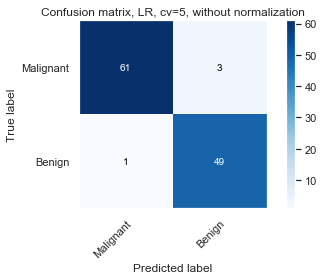

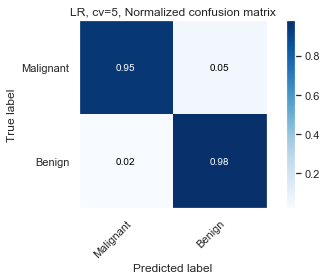

In [60]:
#Gradient Boosting
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val, GBpred, classes=classes,
                      title='Confusion matrix, LR, cv=5, without normalization')

plt.savefig('new_cm_GB_val.png') #need to call before plt.show!

# Plot normalized confusion matrix
plot_confusion_matrix(y_val, GBpred, classes=classes, normalize=True,
                      title='LR, cv=5, Normalized confusion matrix')
plt.savefig('new_cm_GB_val_norm.png')

plt.show()

In [61]:
#confusion matrices fairly close to each other, plot cm and normalized cm for Logistic Regression on test set

### Next steps

*Models are already good! Next step is to get **insights** -- which features are most important in predicting the diagnosis?
    * feature importance parameter in each model?
> feature_importances_ : array, shape (n_features,) 
Return the feature importances (the higher, the more important the feature).

    * if some feature values are easier to obtain and are very indicative in prediction, can help make diagnosis faster (which ones help make the process more efficient; reduce wait time -- data **story** for presentation -- fine-tuning for higher accuracy does not make a good story)*

Other options to check feature importance and multicollinearity: permutation importance, variance inflation factor: https://en.wikipedia.org/wiki/Variance_inflation_factor

#### Feature importance

Check feature_importance attribute for RF and GB; 

Might need to use OOB to get variable importance for RF? 
> different metric (https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#ooberr)


LogReg has coef_ attribute like in linear regression; 
> coef_ is of shape (1, n_features) when the given problem is binary.

svm.SVC has coef_ (and dual_coef):

> coef_ : array, shape = [n_class * (n_class-1) / 2, n_features]. Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

*How to extract feature_importance and coef attributes from fitted pipeline?*
https://stackoverflow.com/questions/28822756/getting-model-attributes-from-scikit-learn-pipeline/28837740#28837740 

https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline?noredirect=1&lq=1 

Both suggest the same method:  
```
pipeline.steps[1][1].feature_importances_
```

##### Logistic Regression - coeff_

In [62]:
LR_pipeline.steps[1] #look at logistic regression part of pipeline (step 0 is StandardScaler)

('logisticregression',
 LogisticRegression(C=5000, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [63]:
LR_pipeline.steps[1][1].coef_  #lost the 10-coeff case?**

array([[-6.69,  1.79, -4.06, 16.74,  0.91,  0.7 ,  0.55,  1.84,  0.77,
        -0.61]])

In [64]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [65]:
#print it out nicely:

LR_coeff = pd.DataFrame(transpose(LR_pipeline.steps[1][1].coef_),
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
LR_coeff

,importance
area_mean,16.744162
concave points_mean,1.842854
texture_mean,1.788154
smoothness_mean,0.907231
symmetry_mean,0.770396
compactness_mean,0.700213
concavity_mean,0.550542
fractal_dimension_mean,-0.609932
perimeter_mean,-4.063025
radius_mean,-6.694918


In [66]:
#to see absolute values
LR_abs_coeff = pd.DataFrame(abs(transpose(LR_pipeline.steps[1][1].coef_)),
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
LR_abs_coeff

,importance
area_mean,16.744162
radius_mean,6.694918
perimeter_mean,4.063025
concave points_mean,1.842854
texture_mean,1.788154
smoothness_mean,0.907231
symmetry_mean,0.770396
compactness_mean,0.700213
fractal_dimension_mean,0.609932
concavity_mean,0.550542


So for the Logistic Regression model, the top coefficients (in magnitude) are **area, radius, perimeter, concave points, texture**. But the negative sign on coefficient for radius doesn't make sense since it's correlated (has a quadratic relationship with area, as shown on pairplot).

##### SVM - coef_ (linear SVC)


In [67]:
svm_pipeline.steps[1][1].get_params

<bound method BaseEstimator.get_params of SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

In [68]:
#change kernel from 'rbf'(default) to 'linear' in order to get coefficients 
#-- make new pipeline for linear svc, *calculate auc score again with this kernel!

In [69]:
#make linear SVM pipeline
lsvm_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=10, kernel='linear', probability=True))

lsvm_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [70]:
lsvm_pipeline.steps[1][1].coef_

array([[ 0.2 ,  1.07, -0.68,  3.27,  0.8 ,  0.58,  0.82,  0.21,  0.36,
        -0.58]])

In [71]:
lsvm_coeff = pd.DataFrame(transpose(lsvm_pipeline.steps[1][1].coef_),
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
lsvm_coeff

,importance
area_mean,3.268382
texture_mean,1.073665
concavity_mean,0.819047
smoothness_mean,0.802022
compactness_mean,0.578646
symmetry_mean,0.364677
concave points_mean,0.212761
radius_mean,0.199238
fractal_dimension_mean,-0.582014
perimeter_mean,-0.677259


So for the SVM-Linear SVC model, the top three coefficients are for **area, texture, and concavity**. Area has a coefficient over 3 times as large as others.

##### Random Forest - feature_importances

In [72]:
RF_pipeline.steps[1][1].feature_importances_  #has s_ at the end!

array([0.14, 0.02, 0.24, 0.13, 0.01, 0.03, 0.18, 0.25, 0.01, 0.  ])

In [73]:
#use this code to print dataframe so feature importances are easier to read

RF_feature_importances = pd.DataFrame(RF_pipeline.steps[1][1].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RF_feature_importances

,importance
concave points_mean,0.247318
perimeter_mean,0.239477
concavity_mean,0.178681
radius_mean,0.136627
area_mean,0.134775
compactness_mean,0.025605
texture_mean,0.019550
smoothness_mean,0.009545
symmetry_mean,0.006941
fractal_dimension_mean,0.001483


*For interpretation and comparison, it might important to note that the coefficients and feature_importance calculations are on different scales (don't know what dimensions/units they are)?*

For the Random Forest model itself (with 100 trees), the features most important for predicting diagnosis are **concave points, perimeter, concavity, radius, and area**. The rest of the features are much less significant (~10 times less).

##### Gradient Boosting

In [74]:
GB_pipeline.steps[1][1].feature_importances_ 

array([0.05, 0.1 , 0.04, 0.09, 0.01, 0.01, 0.03, 0.65, 0.01, 0.01])

In [75]:
#use this code to print as dataframe 

GB_feature_importances = pd.DataFrame(GB_pipeline.steps[1][1].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
GB_feature_importances

,importance
concave points_mean,0.652554
texture_mean,0.098681
area_mean,0.087693
radius_mean,0.052332
perimeter_mean,0.044157
concavity_mean,0.026283
fractal_dimension_mean,0.013217
compactness_mean,0.011393
symmetry_mean,0.007402
smoothness_mean,0.006288


For the Gradient Boosting model, the features with the highest importance for predicting diagnosis is **concave points**. Texture, and area are also somewhat important, but ~6 and 8 times less than concave_points. 

We also know from the pairplot in {2.2} that concavity and concave_points are correlated, so it might be surprising that their importance differ by so much.

##### Decision Tree

In [76]:
#added DT, can't find feature importance or coefficient attributes for NBG or KNN

In [77]:
DT_pipeline.steps[1][1].feature_importances_

array([0.02, 0.11, 0.06, 0.09, 0.02, 0.01, 0.04, 0.66, 0.  , 0.  ])

In [78]:
DT_feature_importances = pd.DataFrame(DT_pipeline.steps[1][1].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
DT_feature_importances

,importance
concave points_mean,0.656952
texture_mean,0.110436
area_mean,0.089841
perimeter_mean,0.064779
concavity_mean,0.035207
radius_mean,0.019215
smoothness_mean,0.015030
compactness_mean,0.008540
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


For decision trees, the most important feature seems to be **concave_points**. The next three are texture, area and perimeter.

#### Conclusion thus far - feature importances or coefficients

Couldn't find coefficient or feature importances attributes for KNN and Gaussian Naive Bayes (couldn't interpret coefficients for MLP, 100 layers, 100 coefficients for each feature). 

So after adding Decision Tree feature importances, we see the top independent features that have the greatest impact on the diagnosis prediction are **area, texture and concave_points**. 

The coefficients having opposite signs for correlated or collinear features (such as for area and radius) seem problematic though. We try to take care of that in the next section. 

### Multicollinearity

#### Feature engineering - remove collinear features

Decided to remove *radius* (gives negative coefficient likely due to ~squared relationship with area, another feature with higher importance), *perimeter* (collinear with radius based on pair plot, also has a negative coefficient, and magnitude is the smallest among its correlated features) and *concavity* (correlated, almost collinear with concave_points, but with a much smaller importance value). Symmetry and fractal dimensions also have importances close to 0 across models, and were also removed.

After feature engineering and getting the most important features, we will run the models on the data frame with fewer features, compare feature importances and coefficients, and select the best model to use on the test set.

In [79]:
s_df = df.iloc[:, 2:12]
s_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [80]:
#use .loc to select columns
ft = s_df.loc[:,['texture_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean']]
#ft = s_df.loc[:,['texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean']]

In [81]:
ft.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean
0,10.38,1001.0,0.11840,0.27760,0.14710
1,17.77,1326.0,0.08474,0.07864,0.07017
2,21.25,1203.0,0.10960,0.15990,0.12790
3,20.38,386.1,0.14250,0.28390,0.10520
4,14.34,1297.0,0.10030,0.13280,0.10430


With this new dataframe (with half of the collinear or strongly-correlated features removed), run Logistic Regression model again to check coefficients/feature importance:

##### New train-val-test split

In [82]:
Xn = ft
#still using the same y column of binary values as above:
    #y = sdf.replace({'diagnosis':['M','B']},{'diagnosis': [1,0]}).diagnosis #replaced M and B with classes 1 and 0 as shown above;
    #assign binary diagnosis column to y

Xn.sample() 

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean
273,15.67,289.9,0.09037,0.04689,0.01407


In [83]:
#split to 80-20 train and test first
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=14) 


In [84]:
#then split train to smaller train and val:
#to get overall 60-20-20 train-val-test split
Xn_train, Xn_val, yn_train, yn_val = train_test_split(X_train, y_train, test_size=.25, random_state=14)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#### Logistic regression

In [85]:
#same LogReg pipeline, now fit on newer, smaller set of features
LR_pipeline.fit(Xn_train, yn_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=5000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=24,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [86]:
roc_auc_score(yn_val, LR_pipeline.predict_proba(Xn_val)[:,1]) #new auc score for class 1
#previously = 0.9884375 in section 3.4.1
#auc score improved after feature engineering (nice side effect/bonus of trying to solve multicollinearity problem)

0.9909375

In [87]:
LR_pipeline.steps[1][1].coef_  
#new coefficients with same pipeline fit on smaller feature set, removing multicollinearity

array([[1.65, 3.83, 0.7 , 0.1 , 2.71]])

In [88]:
ft_LR_coeff = pd.DataFrame(transpose(LR_pipeline.steps[1][1].coef_),
                                   index = Xn_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
ft_LR_coeff

,importance
area_mean,3.825317
concave points_mean,2.711063
texture_mean,1.645721
smoothness_mean,0.700566
compactness_mean,0.096720


So as we expected, after feature engineering (removing the features radius, perimeter, and concavity), the features with the highest importance are **area** , **concave points**, and **texture**. 

#### Linear SVM

In [89]:
lsvm_pipeline.fit(Xn_train, yn_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [90]:
ft_lsvm_coeff = pd.DataFrame(transpose(lsvm_pipeline.steps[1][1].coef_),
                                   index = Xn_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
ft_lsvm_coeff

,importance
area_mean,2.497046
concave points_mean,1.209215
texture_mean,1.092694
smoothness_mean,0.548773
compactness_mean,0.343707


After feature engineering (removing the features radius, perimeter, and concavity), the features with the highest importance are also **area, concave points, and texture** for the linear SVM model.

In [91]:
roc_auc_score(yn_val, lsvm_pipeline.predict_proba(Xn_val)[:,1]) #new auc score for class 1
#previously (before feature engineering) = 0.9884375

0.9903124999999999

#### Random Forest

In [92]:
RF_pipeline.fit(Xn_train, yn_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=20,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [93]:
roc_auc_score(yn_val, RF_pipeline.predict_proba(Xn_val)[:,1]) #new auc score for class 1
#previously (before feature engineering) = 0.9875000

0.9921875

In [94]:
RF_feature_importances = pd.DataFrame(RF_pipeline.steps[1][1].feature_importances_,
                                   index = Xn_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RF_feature_importances

,importance
concave points_mean,0.497530
area_mean,0.307053
compactness_mean,0.130004
texture_mean,0.054463
smoothness_mean,0.010949


The features with the highest importance are **concave points and area** for the Random Forest model.

#### Gradient Boosting

In [95]:
GB_pipeline.fit(Xn_train, yn_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            pr

In [96]:
roc_auc_score(yn_val, GB_pipeline.predict_proba(Xn_val)[:,1]) #new auc score for class 1
#previously (before feature engineering) = 0.9903125, decreased - diminishing returns?

0.9896875

In [97]:
GB_feature_importances = pd.DataFrame(GB_pipeline.steps[1][1].feature_importances_,
                                   index = Xn_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
GB_feature_importances

,importance
concave points_mean,0.678267
area_mean,0.187742
texture_mean,0.109425
compactness_mean,0.018337
smoothness_mean,0.006229


The features with the highest importance are **concave points and area** for the Gradient Boosting model. Texture is the next important feature; the ones after that, compactness and smoothness are over 10 times smaller.

#### Decision Tree



In [98]:
DT_pipeline.fit(Xn_train, yn_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=20,
                                        splitter='best'))],
         verbose=False)

In [99]:
DT_feature_importances = pd.DataFrame(DT_pipeline.steps[1][1].feature_importances_,
                                   index = Xn_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
DT_feature_importances

,importance
concave points_mean,0.685448
area_mean,0.182243
texture_mean,0.090508
compactness_mean,0.023036
smoothness_mean,0.018764


The features with the highest importance are **concave points and area** for the Decision Tree model.

In [100]:
roc_auc_score(yn_val, DT_pipeline.predict_proba(Xn_val)[:,1]) #new auc score for class 1
#previously (before feature engineering) = 0.9487500 - also decreased!

0.9409375

#### Conclusion for feature importance and coefficients
- after feature engineering (discarding correlated features: radius (corr with area and perimeter), and concavity (corr with concave_points), as well as perimeter)
- showing top 3 most important features for each model with attributes coef_ or feature_importances_
- feature names are "***_mean" in dataset

| Model        | Metric         |  Top features | Weights (not normalized)
| ------------- |:-------------:| -----|-----:|
| LogisticRegression      |coeff|area |3.825317|
|       ||concave_points|2.711063|
|  |  | texture |1.645721 |
| SVM - linear SVC     | coeff |area |	2.497046|
|  |   |   concave points |	1.209215|
|   |  | texture|1.092694|
|RandomForest| ft_imps|concave_points|0.497530|
|       ||area|0.307053|
| | | compactness|	0.130004|
|Gradient Boosting| ft_imps| concave_points|0.682807|
|| | area|0.182609|	
| | |texture|0.109485|
|Decision Trees| ft_imps|concave_points|0.685448|
|       ||area|0.182243|
| | |texture|0.090508|

After feature engineering, the top performing models are in agreement that the most significant featurea for predicting the diagnosis are **area and concave_points**.

#### Roc-auc scores after feature engineering

**ROC-AUC Score for Class 1 = "Malignant"** 
 
 Standard Scaler, mean over cv=5 folds, keep 7 decimals, after feature engineering (removed radius, perimeter, and concavity features), for the 5 models with feature importance or coefficient attributes
 
| Model        | Settings         |   Validation Score: AUC |
| ------------- |:-------------:| -----:|
|SVM  | C=10, linear kernel|0.9903125|
| LogisticRegression      |Cs=5000|0.9909375|
|Gradient Boosting| | 0.9900000|
|RandomForest| n_estimators=100, max_depth=2, random_state=20|0.9921875|
| DecisionTree|random_state=20|0.9409375|


After feature engineering to reduce effects of multicollinearity, all model scores improved for metric (AUC score). Now the best performing model (among models with interpretable coefficient or feature importance attributes) is Random Forest with 100 trees each with a depth of 2. 

-----

### Final results

#### Run best model on test set

Performance of best model - logistic regression before feature engineering, but radius having negative coeff while area has positive coeff seems to be an artifact dur to multicollinearity.
After feature engineering (X has 5 features), random forest has a slightly higher auc score. But we still decided to choose logistic regression as the best model for its simplicity and interpretability.

##### Roc-auc score 
Area under the ROC curve (True Positive Rate vs. False Positive Rate)

In [101]:
roc_auc_score(y_test, LR_pipeline.predict_proba(X_test)[:,1]) #auc score for class 1

0.9869695957233545

##### Roc curve for best model on test set

In [102]:
auc_LRte=roc_auc_score(y_test, LR_pipeline.predict_proba(X_test)[:,1]) #auc score for class 1
fpr_LRte, tpr_LRte, thresholds_LRte = roc_curve(y_test, LR_pipeline.predict_proba(X_test)[:,1])


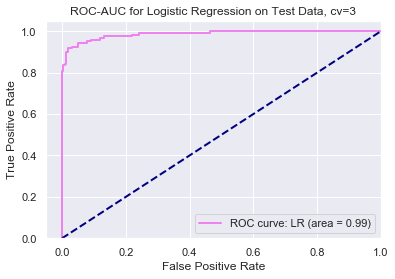

In [103]:
plt.figure()
lw = 2
plt.plot(fpr_LR, tpr_LR, color='violet',
         lw=lw, label='ROC curve: LR (area = %0.2f)' % auc_LRte) #auc for class 1

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC for Logistic Regression on Test Data, cv=3')
plt.legend(loc="lower right")
#plt.savefig('final_roc_auc_LR_te.svg') #need to call before plt.show! after plt.show() is called, a new figure is created
plt.show()

#### Plot confusion matrix on test set (for presenting results)

In [104]:
#LR_pipeline.fit(X_train, y_train) previously fit on train set
LR_result = LR_pipeline.predict(X_test)
cm_LR_te = confusion_matrix(y_test, LR_result)
print('Confusion matrix, LR, test result, without normalization')
cm_LR_te

Confusion matrix, LR, test result, without normalization


array([[69,  4],
       [ 4, 37]])

In [105]:
#modified sklearn-defined example function to plot non-normalized and normalized confusion matrices
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)] #unique_labels undefined
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
            
    #fix subplots in this chunk    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(2),
           yticks=np.arange(2), 
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    
    
    #matplotlib workaround for heatmap cutoff bug:
    ax.set_ylim(len(cm)-0.5, -0.5)
    
    # Hide grid lines
    ax.grid(False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[69  4]
 [ 4 37]]
Normalized confusion matrix
[[0.95 0.05]
 [0.1  0.9 ]]


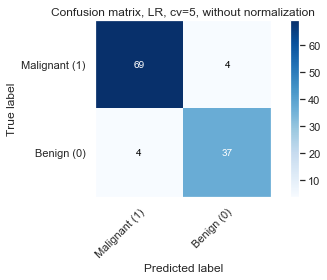

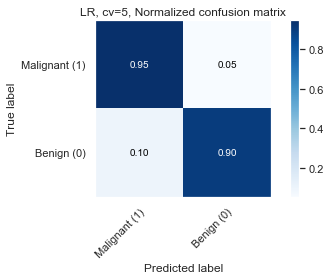

In [106]:
classes = ['Malignant (1)','Benign (0)']

#Logistic Regression
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes,
                      title='Confusion matrix, LR, cv=5, without normalization')

#plt.savefig('cm_LR_testresult.png') #need to call savefig before plt.show to save figure

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes, normalize=True,
                      title='LR, cv=5, Normalized confusion matrix')
#plt.savefig('cm_LR_testresult_norm.png')

plt.show()

Confusion matrix, without normalization
[[69  4]
 [ 4 37]]
Normalized confusion matrix
[[0.95 0.05]
 [0.1  0.9 ]]


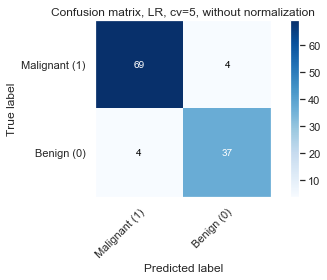

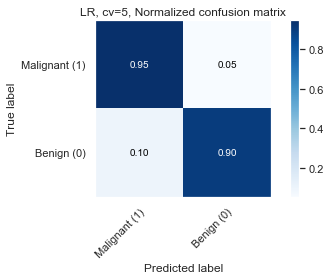

In [107]:
#Logistic Regression
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes,
                      title='Confusion matrix, LR, cv=5, without normalization')

plt.savefig('cm_LR_testresult.svg') #need to call savefig before plt.show!

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes, normalize=True,
                      title='LR, cv=5, Normalized confusion matrix')
plt.savefig('cm_LR_testresult_norm.svg')
#still can't import svg into keynote -- * try converting svg to PDF in Safari, then use in keynote
plt.show()

In [108]:
#change font size for presentation, change colour to match theme?
import matplotlib.style as style

In [109]:
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

In [110]:
style.use('seaborn-poster') #sets the size of the charts
#style.use('default')
#style.use('ggplot')

In [111]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Gill Sans']}) #Helvetica
#rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)


In [112]:
#edited fig code for presentation below:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.RdPu):#change cmap, or change individual colours?
    #cmap=RdPu, or BuPu?
     
    #avoid, ugly for this plot!: Reds, PiYG, PuRd, RdBu
    #cmap=plt.cm.Blues - default
    #custom colormaps?
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    rc('font',**{'family':'sans-serif','sans-serif':['Gill Sans']}) #Helvetica
    #rc('font',**{'family':'serif','serif':['Times']})
    rc('text', usetex=True)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
            
    #fix subplots in this chunk    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    
    # We want to show all ticks...
    ax.set(xticks=np.arange(2),
           yticks=np.arange(2), 
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes)
           #title=title)
           #ylabel='Actual diagnosis',
           #xlabel='Predicted diagnosis')


#     ax.set_ylabel("Actual diagnosis", fontname="Helvetica", fontsize=24) #take out labels to set fonts?
#     ax.set_xlabel("Predicted diagnosis", fontname="Helvetica", fontsize=24) 
#     ax.set_title(title, fontname="Helvetica", fontsize=28, fontweight='bold') 
    ax.set_ylabel("Actual diagnosis", fontsize=24) #take out labels to set fonts?
    ax.set_xlabel("Predicted diagnosis", fontsize=24) 
    ax.set_title(title, fontsize=28, fontweight='bold') 
    
    #*matplotlib workaround for heatmap cutoff bug*:
    ax.set_ylim(len(cm)-0.5, -0.5)
    
    # Hide grid lines
    ax.grid(False)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
 
    
    # Loop over data dimensions and create text annotations.
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center", weight = 'bold',
                    color="white" if cm[i, j] > thresh else "black") #change annotation colour on sqs
    matplotlib.rcParams.update({'font.size': 24}) #make overlaid fonts larger
    fig.tight_layout()
    return ax

In [113]:
#rcParams.keys()

#have trouble changing cbar font from Times back to serif, unresolved issue on GitHub:
#https://github.com/mwaskom/seaborn/issues/1363

#can remove cbar if change code to plot in Seaborn?  or edit manually

Confusion matrix, without normalization
[[69  4]
 [ 4 37]]
Normalized confusion matrix
[[0.95 0.05]
 [0.1  0.9 ]]


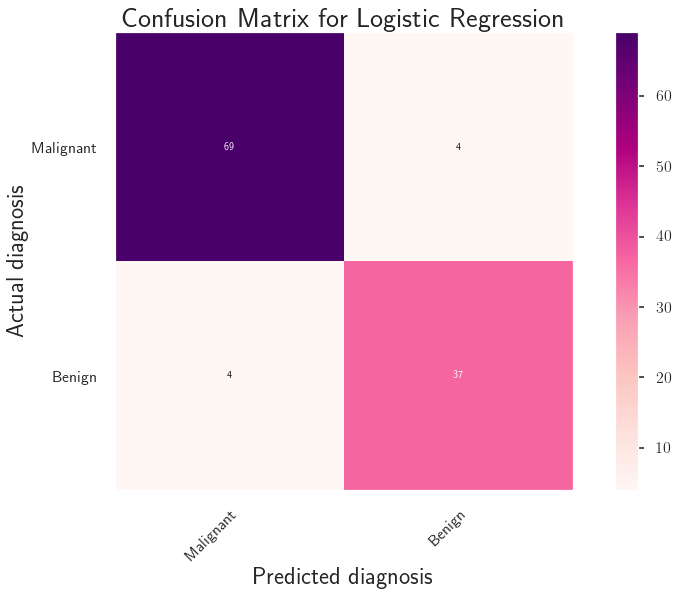

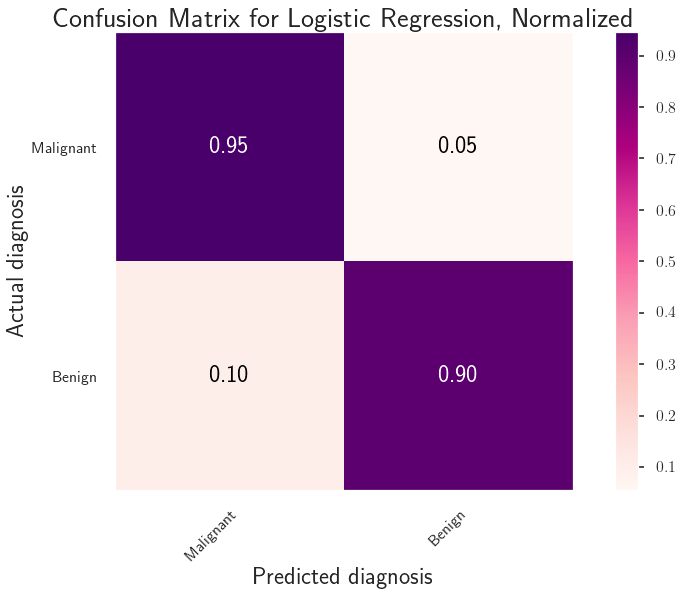

In [114]:
classes = ['Malignant','Benign']

#matplotlib.rcParams.update({'font.sans-serif': ['Gill Sans']})

#Logistic Regression
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes,
                      title='Confusion Matrix for Logistic Regression')

#need to call savefig before plt.show!
#plt.savefig('cm_LR_poster_RdPu_sansserif.svg')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, LR_result, classes=classes, normalize=True,
                      title='Confusion Matrix for Logistic Regression, Normalized')
#plt.savefig('cm_LR_poster_RdPu_sansserif_norm.svg')



plt.show()

---------

### Future work

#### Check permutation importance?


permutation_test_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html#sklearn.model_selection.permutation_test_score

In [115]:
#**check installation env - did I install eli5 in metis env?
# #in cmd line:

# '''
# To see a list of all packages installed in a specific environment:

# If the environment is not activated, in your terminal window or an Anaconda Prompt, run:

# conda list -n metis

# If the environment is activated, in your terminal window or an Anaconda Prompt, run:
# (if already in metis env)
# conda list 
# '''

'\nTo see a list of all packages installed in a specific environment:\n\nIf the environment is not activated, in your terminal window or an Anaconda Prompt, run:\n\nconda list -n metis\n\nIf the environment is activated, in your terminal window or an Anaconda Prompt, run:\n(if already in metis env)\nconda list \n'